# Algorithm: Deutsch-Jozsa

We are given a function 
$$f:\{0,1\}^n\to\{0,1\}$$
realized by an oracle, of which we know that it is either constant (all inputs map to the same output) or balanced (half of the inputs are mapped to '0', the other half to '1')

**GOAL:** Determine whether f is constant or balanced

In [1]:
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *

from qiskit.visualization import plot_histogram


In [2]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: 
    #   n inputs
    #   1 output
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == 'balanced':
        # We apply a controlled-NOT gates for each qubit using the
        # output qubit as the target
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
            
    # Case in which oracle is constant
    if case == 'constant':
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = 'Oracle'
    
    return oracle_gate


In [3]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n+1, n)
    
    # Set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    # And set up te output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n) # |- >
    
    # Let's append the oracle gate to our circuit:
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'
            
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    
    # Finally, perform the H-gates again and measure
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
        
    return dj_circuit


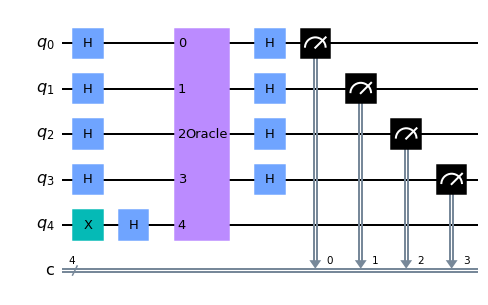

In [4]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw()

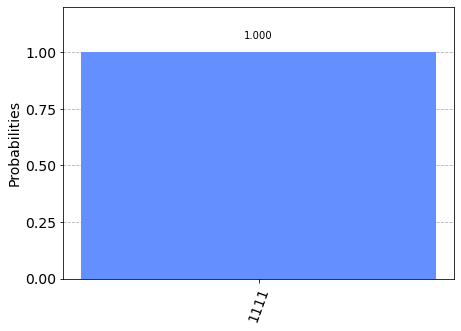

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n, 'balanced')
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)